# Machine Learning - Feature Scaling

Notes and examples from Udacity's Introduction to Machine Learning Course.

## Feature Scaling

[Wiki](https://en.wikipedia.org/wiki/Feature_scaling) page on feature scaling.

[SciKit Learn](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) page on feature scaling.

Feature scaling is the practice of normalizing the value range of each features data between (usually) 0 and 1.  This is done to avoid bias in certain algorithms caused by one or more features having a large range of values in comparison to others.

The simplest form of scaling or normalization is achieved as follows:

$$ x' = \frac{x-x_{min}}{x_{max}-x_{min}} $$

where **x'** is the new normalized value, **x** is the original data point value, and **x max/min** are the features maximum and minimum values.

Looking at the equation above, it can be seen that removal of outliers (with extreme values) should be removed before scaling to avoid erroneous normalization results.

It should be noted that not all M.L. algorithms are sensitive to unscaled values.  For example, while K-Means and SVM with an rbf kernel will experience issues, both Decision Trees and Linear Regression will not.

### Applications to Enron Data

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load in the data, remove outliers, then plot

/Users/IanDeniset/Documents/Courses/Udacity_IntroML/ud120-projects/tools


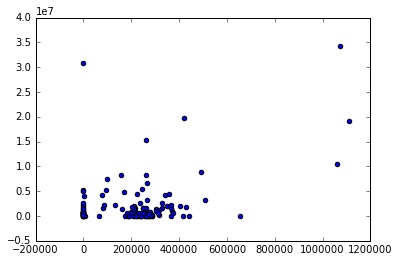

In [2]:
%cd /Users/IanDeniset/Documents/Courses/Udacity_IntroML/ud120-projects/tools
from feature_format import featureFormat, targetFeatureSplit

#load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )

#there's an outlier--remove it! 
data_dict.pop("TOTAL", 0);

feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

#### Scale the data with MinMaxScaler and plot

In [3]:
from sklearn import preprocessing

#note that the MinMaxScaler will be applied to features individually, not to all combined values in the list
scalerfunc = preprocessing.MinMaxScaler()
scaled_features = scalerfunc.fit_transform(finance_features)

#calculate scaled values for new salary and  exercised_stock_option values
#using .transform
print 'The scaled values are: ', scalerfunc.transform([200000.,1000000.])

The scaled values are:  [ 0.17997621  0.02911345]


/Users/IanDeniset/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


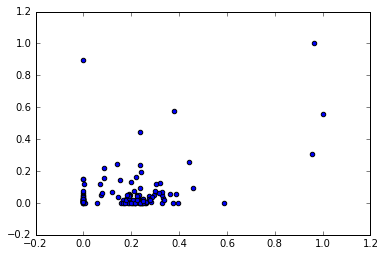

In [4]:
#plot the data
plt.scatter(scaled_features[:,0], scaled_features[:,1])
plt.show()